In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = Path("../data/")
pangodesig_file = data_dir / "bigtable_pangodesig.csv"
sc2ts_file = data_dir / "bigtable_sc2ts.csv"
rhgisaid_file = data_dir / "bigtable_rhgisaid.csv"
rhnextstrain_file = data_dir / "bigtable_rhnextstrain.csv"
covrecomb_file = data_dir / "bigtable_covrecomb.csv"

In [3]:
pangodesig_df = pd.read_csv(pangodesig_file)
sc2ts_df = pd.read_csv(sc2ts_file).sort_values(by="pango").reset_index(drop=True)
rhgisaid_df = pd.read_csv(rhgisaid_file)
rhnextstrain_df = pd.read_csv(rhnextstrain_file)
covrecomb_df = pd.read_csv(covrecomb_file)

pangodesig_df = pangodesig_df.assign(method=["pangodesig"] * len(pangodesig_df))
sc2ts_df = sc2ts_df.assign(method=["sc2ts"] * len(sc2ts_df))
rhgisaid_df = rhgisaid_df.assign(method=["rhgisaid"] * len(rhgisaid_df))
rhnextstrain_df = rhnextstrain_df.assign(method=["rhnextstrain"] * len(rhnextstrain_df))
covrecomb_df = covrecomb_df.assign(method=["covrecomb"] * len(covrecomb_df))

In [4]:
print(all(pangodesig_df.pango == sc2ts_df.pango))
print(all(pangodesig_df.pango == rhgisaid_df.pango))
print(all(pangodesig_df.pango == rhnextstrain_df.pango))
print(all(pangodesig_df.pango == covrecomb_df.pango))

True
True
True
True


In [5]:
# These Pango Xs have samples that passed sc2ts QC.
keep = sc2ts_df["is_in_arg"] | sc2ts_df["is_in_matches"]
sum(keep)

54

In [6]:
pangodesig_df = pangodesig_df[keep].reset_index(drop=True)
sc2ts_df = sc2ts_df[keep].reset_index(drop=True)
rhgisaid_df = rhgisaid_df[keep].reset_index(drop=True)
rhnextstrain_df = rhnextstrain_df[keep].reset_index(drop=True)
covrecomb_df = covrecomb_df[keep].reset_index(drop=True)

In [7]:
shared_cols = [
    "method",
    "pango",
    "type",
    "parent_left_pango",
    "parent_right_pango",
    "interval_left",
    "interval_right",
]
merged_df = pd.concat(
    [
        pangodesig_df[shared_cols],
        sc2ts_df[shared_cols],
        rhgisaid_df[shared_cols],
        rhnextstrain_df[shared_cols],
        covrecomb_df[shared_cols],
    ],
).sort_values(by="pango").reset_index(drop=True)

In [8]:
pd.set_option('display.max_rows', 300)
merged_df

,method,pango,type,parent_left_pango,parent_right_pango,interval_left,interval_right
0,pangodesig,XA,simple,B.1.177,B.1.1.7,21254,21765
1,sc2ts,XA,simple,B.1.177.18,B.1.1.7,20411,21767
2,covrecomb,XA,simple,B.1.177.18,B.1.1.7*,21255.0,21765.0
3,rhnextstrain,XA,simple,B.1.177.18,B.1.1.7,21300.0,21301.0
4,rhgisaid,XA,simple,B.1.177.18,B.1.1.7,21257.0,21258.0
5,pangodesig,XAA,simple,BA.1*,BA.2*,8938,9344
6,covrecomb,XAA,NaN,NaN,NaN,NaN,NaN
7,sc2ts,XAA,simple,BA.1.1.15,BA.2.9,4322,5386
8,rhnextstrain,XAA,simple,BA.1.20,BA.2,8250.0,8251.0
9,rhgisaid,XAA,simple,BA.1.20,BA.2,8250.0,8251.0


Pango parent concordance

In [9]:
dataset_dir = Path("dataset")
alias_key_file = dataset_dir / "rebar" / "alias_key.json"
with open(alias_key_file, 'r') as f:
    alias_key = json.load(f)

In [10]:
def is_concordant(*, gt, query):
    def _remap(x):
        if x.endswith("*"):
            x = x[:-1]
        if x.startswith("X"):
            return x
        split = x.split(".")
        alias = alias_key.get(split[0], "")
        if alias != "" and len(split) > 1:
            x = ".".join([alias] + split[1:])
        return x
    pango_gt = _remap(gt)
    pango_cp = _remap(query)
    if (pango_cp == pango_gt) or (pango_cp.startswith(pango_gt + ".")):
        return True
    return False

In [11]:
import nb_utils
rebar_dir = data_dir / ".." / "notebooks" / "dataset" / "rebar"
alias_key_file = rebar_dir / "alias_key.json"
lineage_notes_file = rebar_dir / "lineage_notes.txt"
pangonet = nb_utils.initialise_pangonet(alias_key_file, lineage_notes_file)

2025-04-15 10:00:52,855 INFO:Creating aliases.
2025-04-15 10:00:52,857 INFO:Creating network.


In [12]:
pangos = pangodesig_df.pango.to_list()
len(pangos)

54

In [13]:
def compare_pango_parents(df, comparator, pangos):
    df_pd = df[df["method"] == "pangodesig"]
    df_cp = df[df["method"] == comparator]
    list_concordant = []
    list_discordant = []
    list_nonrecomb = []
    list_complex = []
    for p in pangos:
        tmp_df_pd = df_pd[df_pd["pango"] == p]
        tmp_df_cp = df_cp[df_cp["pango"] == p]
        parent_left_pd = tmp_df_pd.iloc[0]["parent_left_pango"]
        parent_left_cp = tmp_df_cp.iloc[0]["parent_left_pango"]
        parent_right_pd = tmp_df_pd.iloc[0]["parent_right_pango"]
        parent_right_cp = tmp_df_cp.iloc[0]["parent_right_pango"]
        # Skip the cases with more than one breakpoint as per pango-designation.
        # Compare only the Pango Xs with one breakpoint.
        if tmp_df_pd.iloc[0]["type"] == "complex":
            continue
        # Skip. Pango parent of sc2ts is not comparable.
        if (tmp_df_cp.iloc[0]["parent_left_pango"] == "Unknown (R)") or \
            (tmp_df_cp.iloc[0]["parent_right_pango"] == "Unknown (R)"):
            continue
        # Skip. Not comparable, since data are unavailable.
        if str(tmp_df_cp.iloc[0]["type"]) == "nan":
            continue
        # Record cases where the comparator result is non-recombinant.
        if tmp_df_cp.iloc[0]["type"] == "non":
            list_nonrecomb.append(p)
            continue
        # Record cases where the comparator result is a recombinant with more than one breakpoint.
        if tmp_df_cp.iloc[0]["type"] == "complex":
            list_complex.append(p)
            continue
        # Classify cases with one breakpoint as concordant or discordant in terms of parents.
        assert tmp_df_pd.iloc[0]["type"] == "simple"
        assert tmp_df_cp.iloc[0]["type"] == "simple"
        is_left_concordant = is_concordant(gt=parent_left_pd, query=parent_left_cp)
        is_right_concordant = is_concordant(gt=parent_right_pd, query=parent_right_cp)
        if is_left_concordant and is_right_concordant:
            list_concordant.append(p)
        else:
            list_discordant.append(
                {
                    "pango": p,
                    "parent_left_pd": parent_left_pd,
                    "parent_left_cp": parent_left_cp,
                    "parent_right_pd": parent_right_pd,
                    "parent_right_cp": parent_right_cp,
                }
            )
    total_compared = len(list_concordant) + len(list_discordant) + \
        len(list_nonrecomb) + len(list_complex)
    return (
        total_compared,
        list_concordant,
        list_discordant,
        list_nonrecomb,
        list_complex,
    )

Discordant recombinants: pango-designation vs sc2ts

In [14]:
(
    total_sc2ts,
    concordant_sc2ts,
    discordant_sc2ts,
    nonrecomb_sc2ts,
    complex_sc2ts,
) = compare_pango_parents(df=merged_df, comparator="sc2ts", pangos=pangos)
pd.DataFrame(discordant_sc2ts)

,pango,parent_left_pd,parent_left_cp,parent_right_pd,parent_right_cp
0,XBB,BJ.1,BA.2.10,BM.1.1.1,BM.1.1.1
1,XBF,BA.5.2,BA.5.2.1,CJ.1,BM.1.1.1
2,XBH,BA.2.3.17,BA.2,BA.2.75.2,BA.2.75.2


Discordant recombinants: pango-designation vs RH-GISAID

In [15]:
(
    total_rhgisaid,
    concordant_rhgisaid,
    discordant_rhgisaid,
    nonrecomb_rhgisaid,
    complex_rhgisaid,
) = compare_pango_parents(df=merged_df, comparator="rhgisaid", pangos=pangos)
pd.DataFrame(discordant_rhgisaid)

,pango,parent_left_pd,parent_left_cp,parent_right_pd,parent_right_cp
0,XAS,BA.5*,BA.4.8,BA.2*,BA.2.65
1,XBE,BA.5.2*,BA.5.2.6,BE.4.1,BE.4


Discordant recombinants: pango-designation vs RH-Nextstrain

In [16]:
(
    total_rhnextstrain,
    concordant_rhnextstrain,
    discordant_rhnextstrain,
    nonrecomb_rhnextstrain,
    complex_rhnextstrain,
) = compare_pango_parents(df=merged_df, comparator="rhnextstrain", pangos=pangos)
pd.DataFrame(discordant_rhnextstrain)

,pango,parent_left_pd,parent_left_cp,parent_right_pd,parent_right_cp
0,XBB,BJ.1,BA.2.9,BM.1.1.1,BM.1.1.1
1,XM,BA.1.1*,BA.1.24,BA.2*,BA.2.27
2,XP,BA.1.1*,BA.1.1,BA.2*,BA.5.6.3


Discordant recombinants: pango-designation vs CovRecomb

In [17]:
(
    total_covrecomb,
    concordant_covrecomb,
    discordant_covrecomb,
    nonrecomb_covrecomb,
    complex_covrecomb,
) = compare_pango_parents(df=merged_df, comparator="covrecomb", pangos=pangos)
pd.DataFrame(discordant_covrecomb)

,pango,parent_left_pd,parent_left_cp,parent_right_pd,parent_right_cp
0,XAE,BA.2*,BA.2.3.16,BA.1*,B.1.1.322
1,XBF,BA.5.2,BM.1.1*,CJ.1,BQ.2
2,XN,BA.1*,BA.2.3.16,BA.2*,BA.2.69


In [18]:
summary = [
    {
        "method": "sc2ts",
        "num_compared": total_sc2ts,
        "num_concordant": len(concordant_sc2ts),
        "perc_concordant": len(concordant_sc2ts) / total_sc2ts * 100,
        "num_discordant": len(discordant_sc2ts),
        "num_nonrecomb": len(nonrecomb_sc2ts),
        "num_complex": len(complex_sc2ts),
    },
    {
        "method": "rhgisaid",
        "num_compared": total_rhgisaid,
        "num_concordant": len(concordant_rhgisaid),
        "perc_concordant": len(concordant_rhgisaid) / total_rhgisaid * 100,
        "num_discordant": len(discordant_rhgisaid),
        "num_nonrecomb": len(nonrecomb_rhgisaid),
        "num_complex": len(complex_rhgisaid),
    },
    {
        "method": "rhnextstrain",
        "num_compared": total_rhnextstrain,
        "num_concordant": len(concordant_rhnextstrain),
        "perc_concordant": len(concordant_rhnextstrain) / total_rhnextstrain * 100,
        "num_discordant": len(discordant_rhnextstrain),
        "num_nonrecomb": len(nonrecomb_rhnextstrain),
        "num_complex": len(complex_rhnextstrain),
    },
    {
        "method": "covrecomb",
        "num_compared": total_covrecomb,
        "num_concordant": len(concordant_covrecomb),
        "perc_concordant": len(concordant_covrecomb) / total_covrecomb * 100,
        "num_discordant": len(discordant_covrecomb),
        "num_nonrecomb": len(nonrecomb_covrecomb),
        "num_complex": len(complex_covrecomb),
    },
]
pd.DataFrame(summary)

,method,num_compared,num_concordant,perc_concordant,num_discordant,num_nonrecomb,num_complex
0,sc2ts,47,33,70.212766,3,11,0
1,rhgisaid,41,31,75.609756,2,6,2
2,rhnextstrain,46,36,78.260870,3,5,2
3,covrecomb,23,17,73.913043,3,0,3


#### Overlap of breakpoint intervals

In [19]:
def overlap_breakpoint_intervals(reference, comparator):
    assert reference[0] < reference[1]
    assert comparator[0] < comparator[1]
    ref_size = reference[1] - reference[0]
    cp_size = comparator[1] - comparator[0]
    def _get_overlap(a, b):
        return max(0, min(a[1], b[1]) - max(a[0], b[0]))
    overlap_size = _get_overlap(a=reference, b=comparator)
    is_overlap_with_ref = overlap_size > 0
    overlap_ref_size_ratio = overlap_size / ref_size
    cp_ref_size_ratio = cp_size / ref_size
    return (is_overlap_with_ref, overlap_ref_size_ratio, cp_ref_size_ratio)


def compare_breakpoint_intervals(df, comparator, pangos):
    df_pd = df[df["method"] == "pangodesig"]
    df_cp = df[df["method"] == comparator]
    num_recombs = 0
    num_overlap = 0
    data = []
    for p in pangos:
        tmp_df_pd = df_pd[df_pd["pango"] == p]
        tmp_df_cp = df_cp[df_cp["pango"] == p]
        # Skip Pango Xs with more than one breakpoint.
        if str(tmp_df_pd.iloc[0]["type"]) == "complex":
            continue
        # No intervals to compare. Or skip cases with more than one breakpoint.
        if str(tmp_df_cp.iloc[0]["type"]) in ["nan", "non", "complex"]:
            continue
        bkpts_pd = [
            tmp_df_pd.iloc[0]["interval_left"],
            tmp_df_pd.iloc[0]["interval_right"],
        ]
        bkpts_cp = [
            tmp_df_cp.iloc[0]["interval_left"],
            tmp_df_cp.iloc[0]["interval_right"],
        ]
        if (bkpts_pd[1] in ["na", "-"]) or \
            (bkpts_cp[1] in ["na", "-"]):
            continue
        # Half-open intervals.
        bkpts_pd[0] = int(bkpts_pd[0])
        bkpts_pd[1] = int(bkpts_pd[1])
        bkpts_cp[0] = int(bkpts_cp[0])
        bkpts_cp[1] = int(bkpts_cp[1])
        # Get interval overlap statistics.
        num_recombs += 1
        (
            is_overlap_with_pd,
            overlap_pd_size_ratio,
            cp_pd_size_ratio,
        ) = overlap_breakpoint_intervals(
            reference=bkpts_pd,
            comparator=bkpts_cp,
        )
        distance = max(
            0,
            max(
                bkpts_pd[0] - bkpts_cp[1],
                bkpts_cp[0] - bkpts_pd[1],
            )
        )
        if is_overlap_with_pd:
            num_overlap += 1
        data.append(
            {
                "pango": p,
                "is_overlap_with_pd": is_overlap_with_pd,
                "overlap_pd_size_ratio": overlap_pd_size_ratio,
                "cp_pd_size_ratio": cp_pd_size_ratio,
                "distance": distance,
                "left_bkpt_pd": bkpts_pd[0],
                "right_bkpt_pd": bkpts_pd[1],
                "left_bkpt_cp": bkpts_cp[0],
                "right_bkpt_cp": bkpts_cp[1],
            }
        )
    return (num_recombs, num_overlap, pd.DataFrame(data))

In [20]:
(
    num_recombs_sc2ts,
    num_overlap_sc2ts,
    bkpt_df_sc2ts,
) = compare_breakpoint_intervals(df=merged_df, comparator="sc2ts", pangos=pangos)
bkpt_df_sc2ts

,pango,is_overlap_with_pd,overlap_pd_size_ratio,cp_pd_size_ratio,distance,left_bkpt_pd,right_bkpt_pd,left_bkpt_cp,right_bkpt_cp
0,XA,True,1.000000,2.653620,0,21254,21765,20411,21767
1,XAA,False,0.000000,2.620690,3552,8938,9344,4322,5386
2,XAD,False,0.000000,3.331906,2,26062,26529,24504,26060
3,XAE,True,1.000000,1.007772,0,24505,26049,24504,26060
4,XAF,False,0.000000,0.294887,0,10447,11288,10199,10447
5,XAG,False,0.000000,0.566560,1129,6515,8393,4322,5386
6,XAL,True,1.000000,1.660897,0,17412,19954,17411,21633
7,XAM,False,0.000000,0.962896,2701,8087,9192,4322,5386
8,XAP,False,0.000000,3.331906,2,26062,26529,24504,26060
9,XBB,False,0.000000,5.568182,314,22891,22935,22332,22577


In [21]:
(
    num_recombs_rhgisaid,
    num_overlap_rhgisaid,
    bkpt_df_rhgisaid,
) = compare_breakpoint_intervals(df=merged_df, comparator="rhgisaid", pangos=pangos)
len(bkpt_df_rhgisaid)

32

In [22]:
(
    num_recombs_rhnextstrain,
    num_overlap_rhnextstrain,
    bkpt_df_rhnextstrain,
) = compare_breakpoint_intervals(df=merged_df, comparator="rhnextstrain", pangos=pangos)
len(bkpt_df_rhnextstrain)

35

In [23]:
(
    num_recombs_covrecomb,
    num_overlap_covrecomb,
    bkpt_df_covrecomb,
) = compare_breakpoint_intervals(df=merged_df, comparator="covrecomb", pangos=pangos)
len(bkpt_df_covrecomb)

20

In [24]:
summary = [
    {
        "method": "sc2ts",
        "num_recombs": num_recombs_sc2ts,
        "num_overlap": num_overlap_sc2ts,
        "perc_overlap": num_overlap_sc2ts / num_recombs_sc2ts * 100,
    },
    {
        "method": "rhgisaid",
        "num_recombs": num_recombs_rhgisaid,
        "num_overlap": num_overlap_rhgisaid,
        "perc_overlap": num_overlap_rhgisaid / num_recombs_rhgisaid * 100,
    },
    {
        "method": "rhnextstrain",
        "num_recombs": num_recombs_rhnextstrain,
        "num_overlap": num_overlap_rhnextstrain,
        "perc_overlap": num_overlap_rhnextstrain / num_recombs_rhnextstrain * 100,
    },
        {
        "method": "covrecomb",
        "num_recombs": num_recombs_covrecomb,
        "num_overlap": num_overlap_covrecomb,
        "perc_overlap": num_overlap_covrecomb / num_recombs_covrecomb * 100,
    },
]
pd.DataFrame(summary)

,method,num_recombs,num_overlap,perc_overlap
0,sc2ts,33,23,69.696970
1,rhgisaid,32,20,62.500000
2,rhnextstrain,35,23,65.714286
3,covrecomb,20,13,65.000000


In [25]:
def plot_breakpoint_interval_properties(df, title):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 2))
    fig.suptitle(title)
    ax[0].set_ylabel("Number of recombinants")
    ax[0].set_xlabel("Interval overlap size / reference interval size")
    #ax[0].set_xscale("log")
    ax[0].hist(df["overlap_pd_size_ratio"], bins=30)
    ax[1].set_xlabel("Comparator interval size / reference interval size")
    #ax[1].set_xscale("log")
    ax[1].hist(df["cp_pd_size_ratio"], bins=1000)
    ax[2].set_xlabel("Distance between intervals")
    ax[2].hist(df["distance"], bins=30);

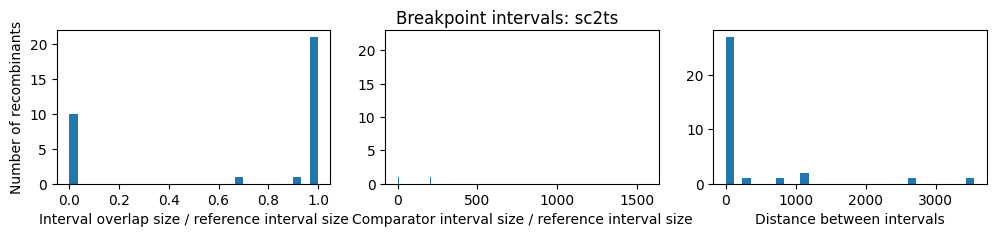

In [26]:
plot_breakpoint_interval_properties(bkpt_df_sc2ts, title="Breakpoint intervals: sc2ts")

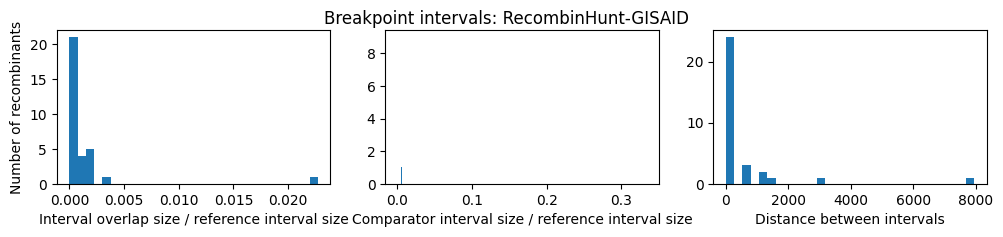

In [27]:
# Not really useful, since the breakpoint intervals are misleadingly precise.
plot_breakpoint_interval_properties(bkpt_df_rhgisaid, title="Breakpoint intervals: RecombinHunt-GISAID")

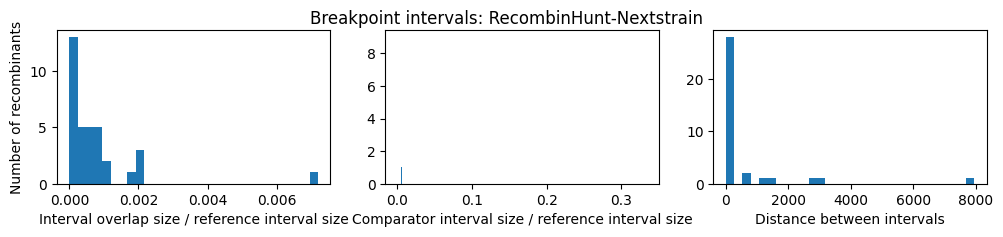

In [28]:
plot_breakpoint_interval_properties(bkpt_df_rhnextstrain, title="Breakpoint intervals: RecombinHunt-Nextstrain")

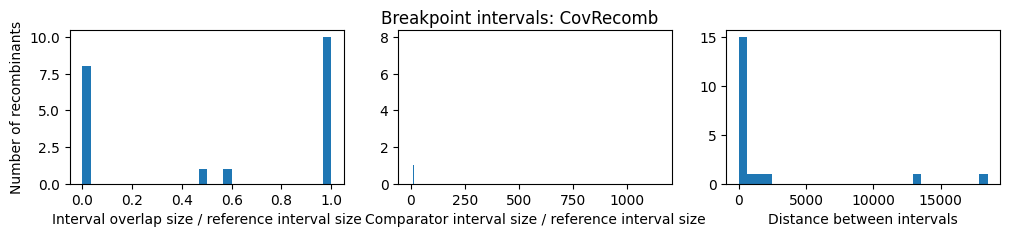

In [29]:
plot_breakpoint_interval_properties(bkpt_df_covrecomb, title="Breakpoint intervals: CovRecomb")